In [ ]:
import pandas as pd
import numpy as np

In [ ]:
주가 = [ np.random.randint(10, 50) + i*2 for i in range(100) ]

In [ ]:
import matplotlib.pyplot as plt
 
plt.plot(np.arange(1, 101), 주가)
plt.plot()

plt.show()

## 딥러닝

In [ ]:
독립 = pd.DataFrame(np.arange(1, 101))
종속 = pd.DataFrame(주가)
독립.shape, 종속.shape

((100, 1), (100, 1))

In [ ]:
독립
종속

In [ ]:
import tensorflow as tf

In [ ]:
#모델 준비
X = tf.keras.layers.Input(shape=[1]) # 독립변수의 col
Y = tf.keras.layers.Dense(1)(X) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 126.9111
Epoch 2/10
4/4 [==============================] - 0s 2ms/step - loss: 126.9060
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 126.8780
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 126.8718
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 126.8839
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 126.9415
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 126.9017
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 126.8589
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 126.9249
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 126.8568


In [ ]:
model.predict([50])
model.predict([40])

array([[106.269516]], dtype=float32)

In [ ]:
model.predict(독립)

In [ ]:
model.get_weights()

[array([[2.018191]], dtype=float32), array([25.541872], dtype=float32)]

In [ ]:
2.018191 * 50 + 25.541872

126.451422

In [ ]:
model.predict([50])

array([[126.45142]], dtype=float32)

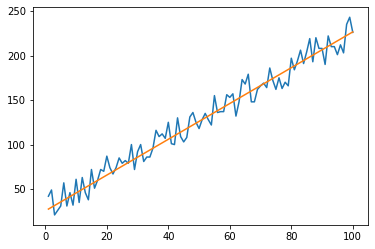

In [ ]:
plt.plot(np.arange(1, 101), 주가)
plt.plot(np.arange(1, 101), 2.01 * np.arange(1, 101) + 25.54)
plt.plot()

plt.show()

In [ ]:
오차값 = 종속 - model.predict(독립)
오차값

In [ ]:
오차값의제곱 = 오차값 ** 2
오차값의제곱

In [ ]:
(오차값의제곱.sum())/100 ## MSE

0    126.856588
dtype: float64

## 최소 제곱법

* y = ax + b
* 참고자료 : https://ko.wikipedia.org/wiki/%EC%B5%9C%EC%86%8C%EC%A0%9C%EA%B3%B1%EB%B2%95

${\displaystyle a={\frac {n\Sigma XY-\Sigma X\Sigma Y}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$

${\displaystyle b={\frac {\Sigma X^{2}\Sigma Y-\Sigma X\Sigma XY}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$

In [ ]:
두수의곱 = 독립*종속
int(100 * 두수의곱.sum())

81242700

In [ ]:
int(독립.sum() * 종속.sum())

64862200

In [ ]:
int(100 * (독립 ** 2).sum())

33835000

In [ ]:
int(독립.sum() * 독립.sum())

25502500

In [ ]:
분자 = int(100 * 두수의곱.sum()) - int(독립.sum() * 종속.sum())
분모 = int(100 * (독립 ** 2).sum()) - int(독립.sum() * 독립.sum())

In [ ]:
분자 / 분모

1.965856585658566

In [ ]:
model.get_weights()

[array([[2.018191]], dtype=float32), array([25.541872], dtype=float32)]

${\displaystyle b={\frac {\Sigma X^{2}\Sigma Y-\Sigma X\Sigma XY}{n\Sigma X^{2}-\Sigma X\Sigma X}}}$

In [ ]:
분자 = ((독립**2).sum() * 종속.sum()) - (독립.sum() * (독립*종속).sum())
분모 = (100 * (독립**2).sum()) - (독립.sum() * 독립.sum())

In [ ]:
분자 / 분모

0    29.164242
dtype: float64

## 단순데이터의 히든레이어

In [ ]:
매출액 = [2, 5, 10, 20, 40, 80]
광고액 = [1, 2, 4, 6, 8, 10]
순익 = [1, 1.5, 3, 10, 20, 60]

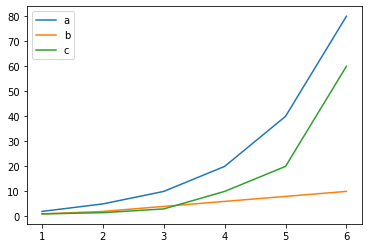

In [ ]:
plt.plot(np.arange(1, 7), 매출액, label='a')
plt.plot(np.arange(1, 7), 광고액, label='b')
plt.plot(np.arange(1, 7), 순익, label='c')

plt.legend()
plt.show()

In [ ]:
독립 = pd.DataFrame({
    '매출액' : 매출액,
    '광고액' : 광고액
})
종속 = pd.DataFrame({
    '순익' : 순익
})
독립.shape, 종속.shape

((6, 2), (6, 1))

In [ ]:
독립

매출액  광고액
0    2    1
1    5    2
2   10    4
3   20    6
4   40    8
5   80   10

In [ ]:
#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(5, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [ ]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.0776
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0645
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0645
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0776
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0645
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 0.0776
Epoch 10/10
1/1 [==============================] - 0s 6ms/step - loss: 0.0644


In [ ]:
model.get_weights()

[array([[ 0.13907404, -1.1992804 , -0.08514377,  0.19539104,  1.0607067 ],
        [ 0.1503897 ,  0.25351313,  0.9445721 ,  1.2783636 , -0.09151014]],
       dtype=float32),
 array([-2.128808  ,  0.84849983, -1.1009531 , -1.4451069 ,  1.6059966 ],
       dtype=float32),
 array([[ 0.9668759 , -2.189831  , -1.4160697 , -2.2861729 , -0.7814767 ],
        [-1.069848  , -2.9271662 , -0.82397777, -1.1014566 ,  0.27123564],
        [ 1.3336539 , -1.0783886 ,  0.9553802 , -0.49265176, -1.6961937 ],
        [ 0.8207123 ,  0.04261134, -0.38079157, -0.60807854,  0.7596081 ],
        [-0.39332125, -0.23819275,  0.01834385,  0.00498553,  1.0490127 ]],
       dtype=float32),
 array([-1.0256203,  1.294643 ,  1.319705 ,  1.3473282,  1.5829551],
       dtype=float32),
 array([[-2.6935904],
        [ 1.7977272],
        [-6.8405094],
        [ 1.5219707],
        [ 0.572388 ]], dtype=float32),
 array([1.5798413], dtype=float32)]

In [ ]:
model.predict([[10, 4]])

array([[3.1647365]], dtype=float32)

In [ ]:
model.predict(독립)

array([[ 1.0387847],
       [ 1.5659081],
       [ 3.1647375],
       [10.137856 ],
       [20.576534 ],
       [60.284546 ]], dtype=float32)

In [ ]:
종속

순익
0   1.0
1   1.5
2   3.0
3  10.0
4  20.0
5  60.0

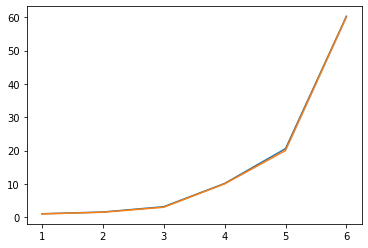

In [ ]:
plt.plot(np.arange(1, 7), model.predict(독립))
plt.plot(np.arange(1, 7), 종속)

plt.show()

## 복잡 데이터의 히든레이어
* 그럼 주가는 잘 맞출까? (곡선 형태)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


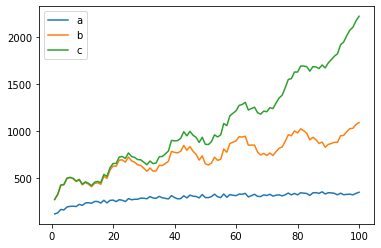

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

광고액 = [ np.random.randint(10, 50) + np.log(i*5) * 50 for i in range(1, 101) ]
계절성 = [ np.sin(i/3)*100 + i*3 + j*2 for i, j in zip(np.arange(1, 101), 광고액) ]
매출액 = [i**(np.log(np.log(i))) + j for i, j in zip(np.arange(1, 101), 계절성) ]

plt.plot(np.arange(1, 101), 광고액, label='a')
plt.plot(np.arange(1, 101), 계절성, label='b')
plt.plot(np.arange(1, 101), 매출액, label='c')

plt.legend()
plt.show()

In [51]:
독립 = pd.DataFrame({
    '계절성' : 계절성,
    '광고액' : 광고액
})
종속 = pd.DataFrame({
    '매출액' : 매출액
})
독립.shape, 종속.shape

((100, 2), (100, 1))

In [53]:
import tensorflow as tf

#모델 준비
X = tf.keras.layers.Input(shape=[2]) # 독립변수의 col
H = tf.keras.layers.Dense(5, activation='swish')(X)
H = tf.keras.layers.Dense(5, activation='swish')(H)
Y = tf.keras.layers.Dense(1)(H) # 종속변수의 col
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse') # MSE(Mean squared error)

In [56]:
model.fit(독립, 종속, epochs=10000, verbose=0)
model.fit(독립, 종속, epochs=10)

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 41707.3164
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 42124.0352
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 41490.3359
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 41539.5781
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 41851.1367
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 41690.7344
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 42086.4453
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 41468.6836
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 41834.9766
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 41542.3516


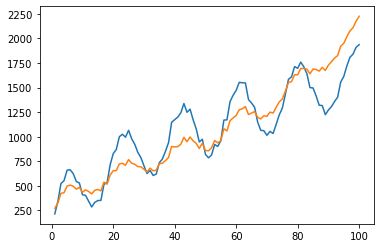

In [57]:
plt.plot(np.arange(1, 101), model.predict(독립))
plt.plot(np.arange(1, 101), 종속)

plt.show()